# EDA

In [1]:
import time
import random
import tqdm

import folium
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

#option
sns.set_theme(style='darkgrid', palette='rocket')
pd.set_option('max_colwidth', 600)
pd.set_option('display.width', 600)

In [2]:
df = pd.read_csv('df_2.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 464
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            459 non-null    object 
 1   day             459 non-null    int64  
 2   month           459 non-null    int64  
 3   year            459 non-null    int64  
 4   dayofweek       459 non-null    int64  
 5   rooms           459 non-null    int64  
 6   district        389 non-null    object 
 7   street          459 non-null    object 
 8   floor           459 non-null    float64
 9   total_floors    459 non-null    float64
 10  total_area      459 non-null    float64
 11  living_area     459 non-null    float64
 12  kitchen_area    459 non-null    float64
 13  price           459 non-null    float64
 14  lat_long        322 non-null    object 
 15  park_eko        322 non-null    float64
 16  attraction      322 non-null    float64
 17  south           322 non-null    float64


In [4]:
round(df.isna().mean(), 2)

date              0.00
day               0.00
month             0.00
year              0.00
dayofweek         0.00
rooms             0.00
district          0.15
street            0.00
floor             0.00
total_floors      0.00
total_area        0.00
living_area       0.00
kitchen_area      0.00
price             0.00
lat_long          0.30
park_eko          0.30
attraction        0.30
south             0.30
eternal_fire      0.30
veter             0.30
city_center       0.30
price_sq_meter    0.00
floor_type        0.00
dtype: float64

In [5]:
df.describe()

,day,month,year,dayofweek,rooms,floor,total_floors,total_area,living_area,kitchen_area,price,park_eko,attraction,south,eternal_fire,veter,city_center,price_sq_meter
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,459.000000
mean,18.296296,6.976035,2022.980392,2.917211,2.145969,3.488017,6.071895,55.798540,31.827102,8.776623,3450.636166,4.248199,4.243634,5.409658,3.832826,4.908696,3.792422,63.912359
std,8.628138,1.824587,0.138800,1.587928,0.959007,2.545946,3.571670,28.023285,18.047769,4.317350,1540.046181,2.142590,2.469139,3.315186,1.967305,2.851446,2.141285,16.846797
min,1.000000,1.000000,2022.000000,0.000000,-1.000000,-1.000000,1.000000,16.000000,0.000000,0.000000,400.000000,0.450000,0.850000,0.110000,0.670000,0.340000,0.160000,6.907895
25%,12.000000,6.000000,2023.000000,2.000000,1.000000,1.000000,4.000000,41.000000,19.000000,6.000000,2375.000000,2.990000,2.315000,2.502500,2.140000,2.002500,2.085000,58.090891
50%,22.000000,8.000000,2023.000000,3.000000,2.000000,3.000000,5.000000,51.000000,30.000000,8.000000,3300.000000,3.960000,3.550000,5.460000,3.600000,5.555000,3.430000,64.993289
75%,25.000000,8.000000,2023.000000,4.000000,3.000000,5.000000,9.000000,65.000000,43.000000,10.000000,4250.000000,5.280000,5.652500,7.960000,5.277500,7.355000,5.390000,71.471861
max,31.000000,12.000000,2023.000000,6.000000,5.000000,14.000000,17.000000,318.000000,150.000000,35.500000,12750.000000,12.640000,14.330000,15.830000,10.630000,10.760000,10.980000,141.212121


In [6]:
df

,date,day,month,year,dayofweek,rooms,district,street,floor,total_floors,...,price,lat_long,park_eko,attraction,south,eternal_fire,veter,city_center,price_sq_meter,floor_type
0,2023-08-27,27,8,2023,6,2,NaN,"Магнитогорск, Советская, 174",5.0,9.0,...,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.321285,middle
1,2023-08-27,27,8,2023,6,2,Орджоникидзевский,"Магнитогорск, Коробова, 6/1",13.0,14.0,...,3999.0,"(53.363824550000004, 59.004303190798495)",5.49,3.89,1.61,4.77,7.27,5.08,60.407855,middle
2,2023-08-27,27,8,2023,6,3,Орджоникидзевский,"Магнитогорск, Жукова, 25",7.0,10.0,...,5400.0,"(53.35195725, 58.97073090000001)",5.72,3.45,1.33,6.16,8.81,6.18,83.076923,middle
3,2023-08-26,26,8,2023,5,3,Ленинский,"Магнитогорск, Октябрьская, 32/1",5.0,5.0,...,4500.0,"(53.413480899999996, 58.9874088)",2.63,4.23,6.86,0.88,1.94,0.85,72.115385,last
4,2023-08-26,26,8,2023,5,1,Ленинский,"Магнитогорск, Карла Маркса, 7",4.0,4.0,...,2300.0,"(53.4355721, 58.9803376)",4.14,6.30,9.34,3.38,1.50,3.16,70.987654,last
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,2023-08-20,20,8,2023,6,3,Ленинский,"Магнитогорск, Николая Шишка, 22",5.0,5.0,...,5500.0,"(53.4310234, 58.9962457)",4.32,6.22,8.82,2.81,0.34,2.86,74.324324,last
461,2022-05-12,12,5,2022,3,2,Ленинский,"Магнитогорск, Молодежная, 19А",1.0,5.0,...,930.0,"(53.48027, 59.0907278)",12.63,14.30,15.76,10.60,8.28,10.96,22.682927,first
462,2023-06-01,1,6,2023,3,2,Правобережный,"Магнитогорск, Им. газеты Правда, 22",5.0,5.0,...,2650.0,"(53.408726099999996, 58.9763705)",1.74,3.41,6.40,1.03,2.77,0.31,62.352941,last
463,2023-08-08,8,8,2023,1,2,Орджоникидзевский,"Магнитогорск, Сиреневый проезд, 10",3.0,9.0,...,3350.0,"(53.361738599999995, 59.0091756)",5.87,4.29,1.65,5.06,7.53,5.41,67.000000,middle


### Дата обновления объявления

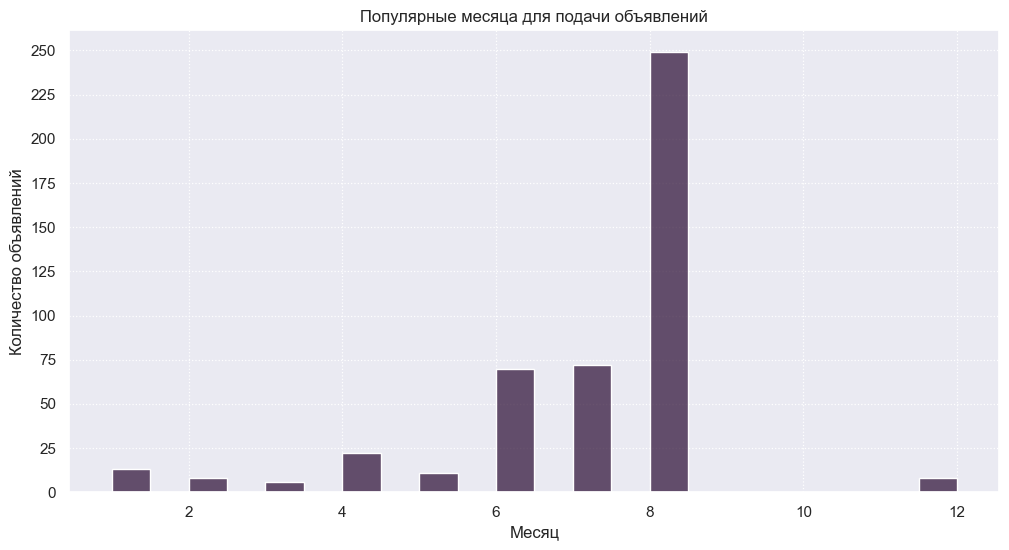

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df['month'])
plt.grid(linestyle=':', linewidth=0.9)
plt

plt.title('Популярные месяца для подачи объявлений')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 275, step=25));

Продавцы недвижимости стремятся обновлять объявления, так как на сайте они ранжированы по дате и, соответственно, более новые будут выше и заметней для потенциальных клиетов. Из этого следует что мы не сможем сдлеать вывод о сезонности  в продажах квартир, популярных  днях недели и других признаках основанных на дате.

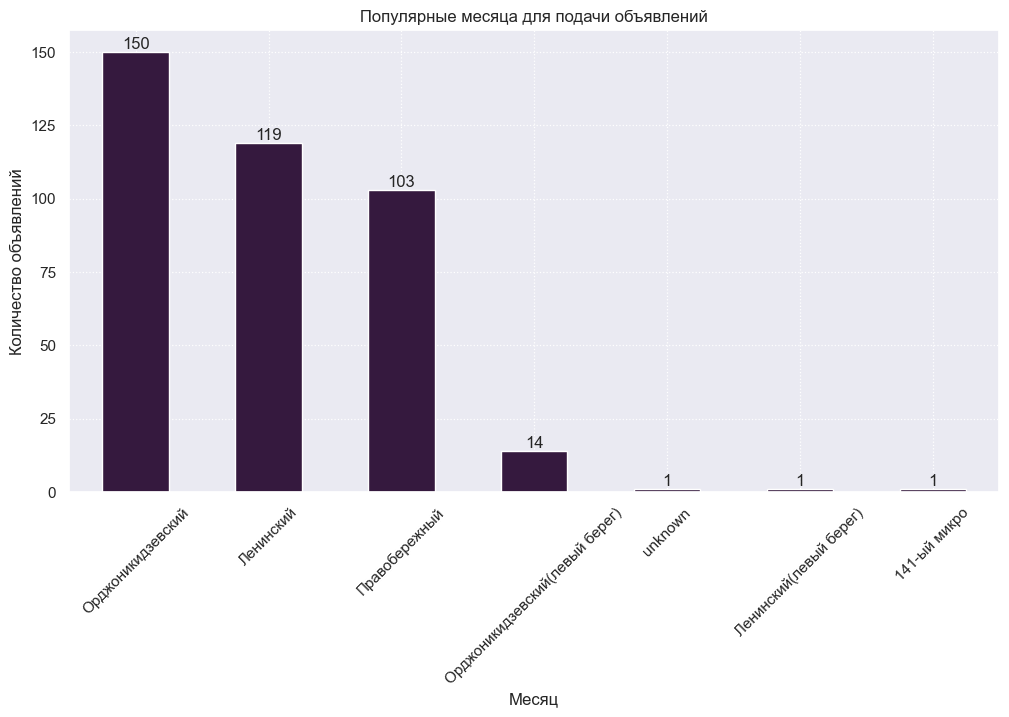

In [8]:
plt.figure(figsize=(12,6))
ax = df.district.value_counts().plot(kind='bar')
plt.grid(linestyle=':', linewidth=0.9)
plt.xticks(rotation=45)
for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Популярные месяца для подачи объявлений')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 175, step=25));

Наиболее часто встречается недвижимость с Орджоникидзевского района. Расположение относительно берега р. Урал похоже что часто не указывается.

Топ 10 популярных домов

In [9]:
df['street'].value_counts().head(10)

street
Магнитогорск, Ленина пр-т, 18      10
Магнитогорск, Карла Маркса, 233     5
Магнитогорск, Ленина пр-т, 87а      5
Магнитогорск, unknown               5
Магнитогорск, Зеленый Лог, 63       4
Магнитогорск, Помяловского, 7       3
Магнитогорск, Ленина пр-т, 129      3
Магнитогорск, Ленина пр-т, 87А      3
Магнитогорск, Ленина пр-т, 214Б     3
Магнитогорск, Труда, 49/1           3
Name: count, dtype: int64

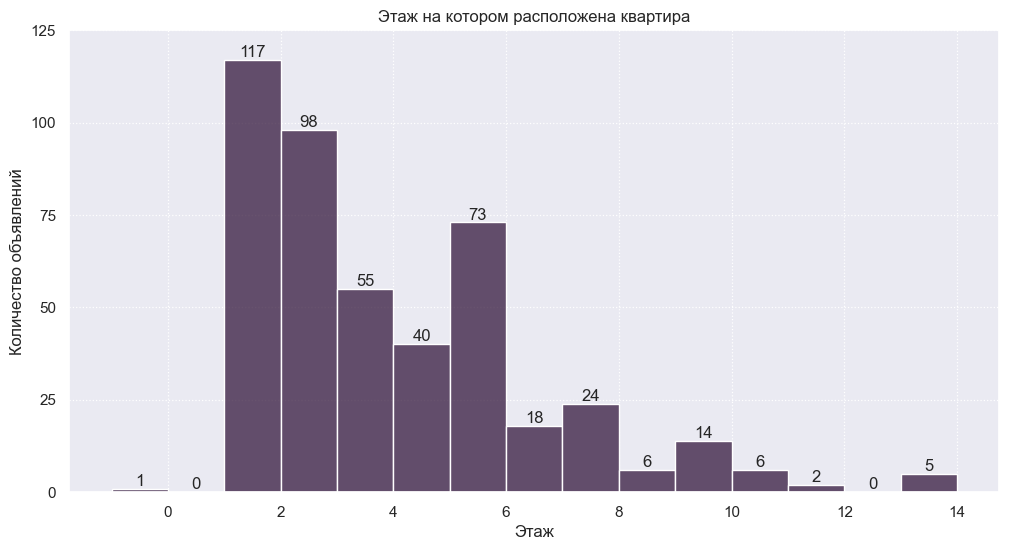

In [10]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['floor'])
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Этаж на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 145, step=25));

По популярности выделяются 1,2 и 5 этаж

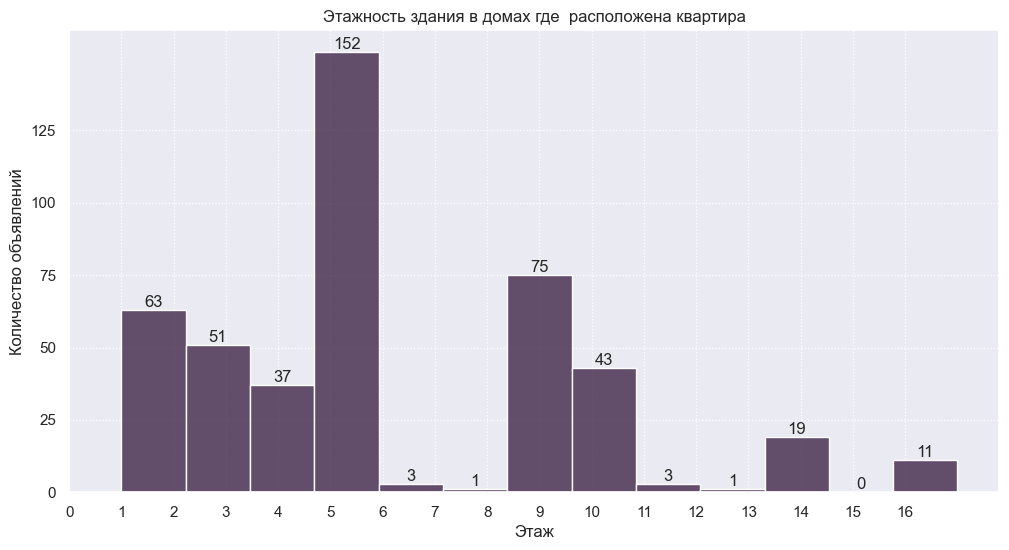

In [11]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['total_floors'])
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Этажность здания в домах где  расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 145, step=25))
plt.xticks(np.arange(0, 17, step=1));

По всей видимости преобладает 5 этажная застройка. Также типичны  2,3,9,10 этажные дома 

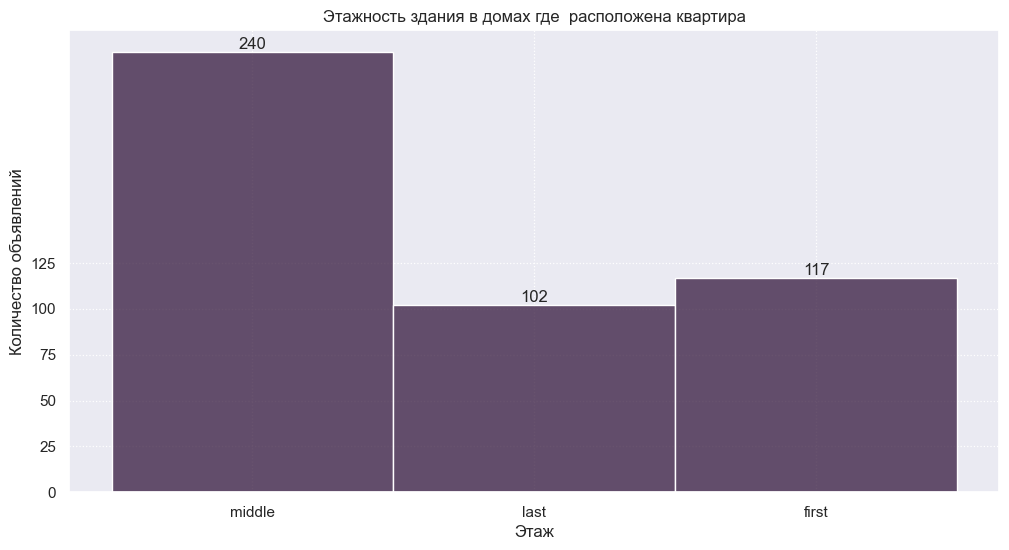

In [12]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['floor_type'])
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Этажность здания в домах где  расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 145, step=25));

Первые и последние этажи встречаются довольно часто относительно остальных

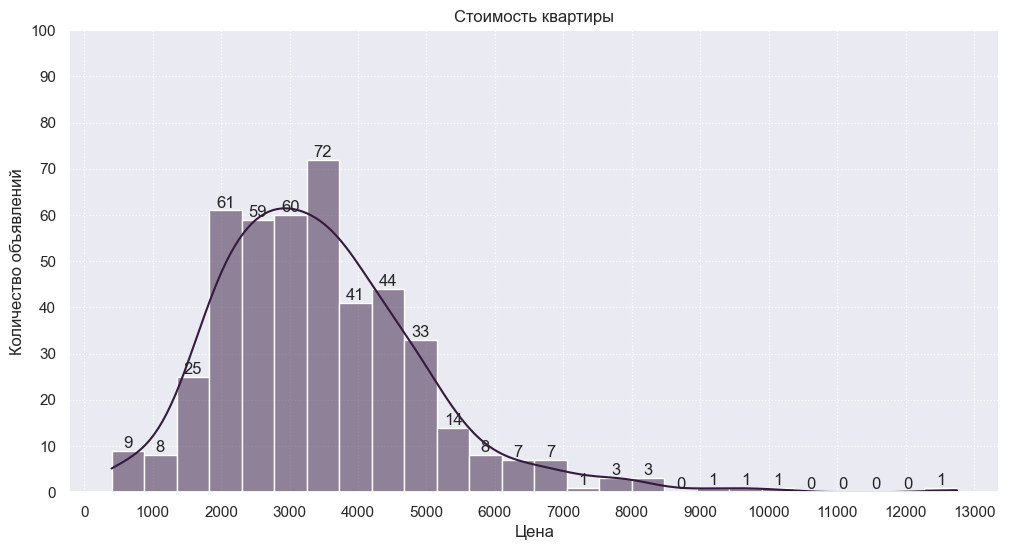

In [13]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df['price'], kde=True)
plt.grid(linestyle=':', linewidth=0.9)
plt

for c in ax.containers:
    ax.bar_label(c, label_type='edge')

plt.title('Стоимость квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.yticks(np.arange(0, 110, step=10))
plt.xticks(np.arange(0, 14000, step=1000));

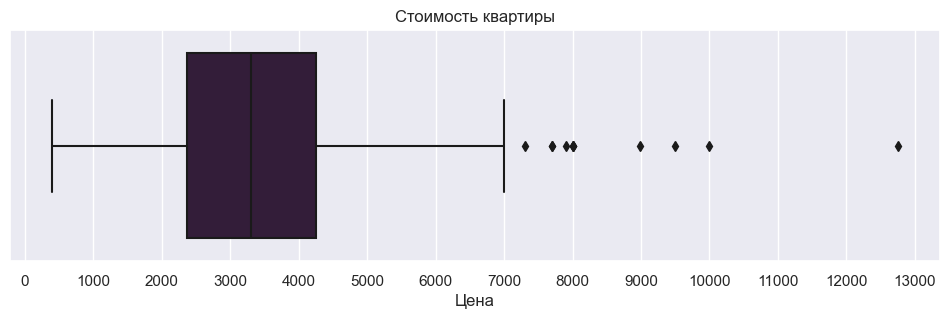

In [14]:
plt.figure(figsize=(12,3))
plt.title('Стоимость квартиры')
sns.boxplot(x = "price",data=df, orient='h')
plt.xlabel('Цена')
plt.xticks(np.arange(0, 14000, step=1000));

Основная часть цен на квартиры лежит в диапазоне от 2,3 до 4,2 млн. Встречаются как очень дешевые квартиры около 1 млн. Так и сверхдорогие свыше 7 млн.

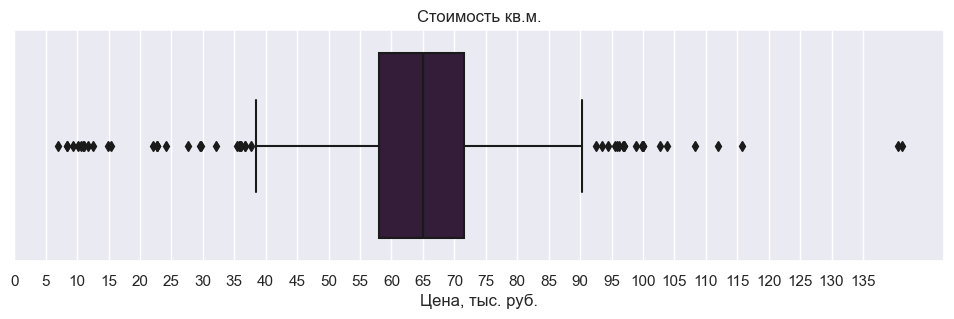

In [28]:
plt.figure(figsize=(12,3))
plt.title('Стоимость кв.м.')
sns.boxplot(x = "price_sq_meter",data=df, orient='h')
plt.xlabel('Цена, тыс. руб.')
plt.xticks(np.arange(0, 140, step=5));

Цена за 1м2 в среднем от 57 до 72 тыс. Значения меньше 17 и выше 120 выглядят как выбросы и не отражают основную тенденцию разброса цен на рынке

In [16]:
df.columns

Index(['date', 'day', 'month', 'year', 'dayofweek', 'rooms', 'district', 'street', 'floor', 'total_floors', 'total_area', 'living_area', 'kitchen_area', 'price', 'lat_long', 'park_eko', 'attraction', 'south', 'eternal_fire', 'veter', 'city_center', 'price_sq_meter', 'floor_type'], dtype='object')

<Axes: xlabel='city_center', ylabel='price_sq_meter'>

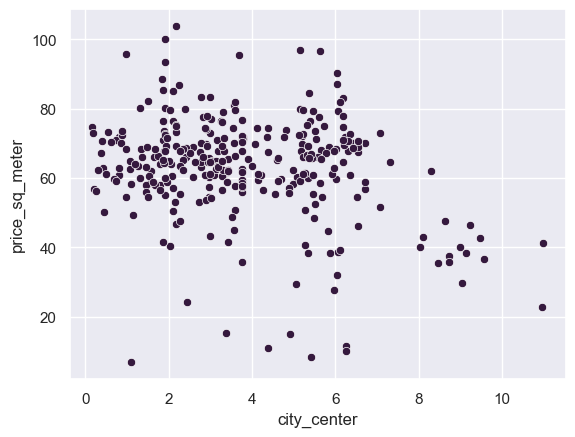

In [17]:
sns.scatterplot(data=df, x="city_center", y="price_sq_meter");

На удалении до 7-х км от центра встречается недвижимость в широком диапазоне цен. Влияние стоимости на удаленности от центра начинает сказываться примерно с 7 км.

<Axes: ylabel='price_sq_meter'>

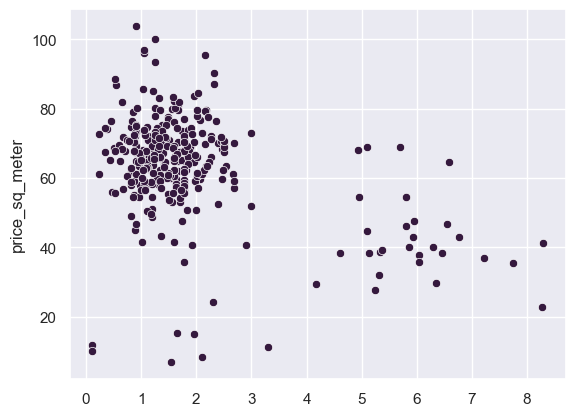

In [18]:
sns.scatterplot(data=df, x=df[['park_eko', 'attraction', 'south', 'eternal_fire', 'veter']].min(axis=1), y="price_sq_meter");

Удаленность от парков не так явно влияет на цену недвижимости, по большей части парки расположены в пределах 3-км от основного числа объектов.

In [20]:
import phik

interval columns not set, guessing: ['day', 'month', 'year', 'dayofweek', 'rooms', 'floor', 'total_floors', 'total_area', 'living_area', 'kitchen_area', 'price', 'park_eko', 'attraction', 'south', 'eternal_fire', 'veter', 'city_center', 'price_sq_meter']


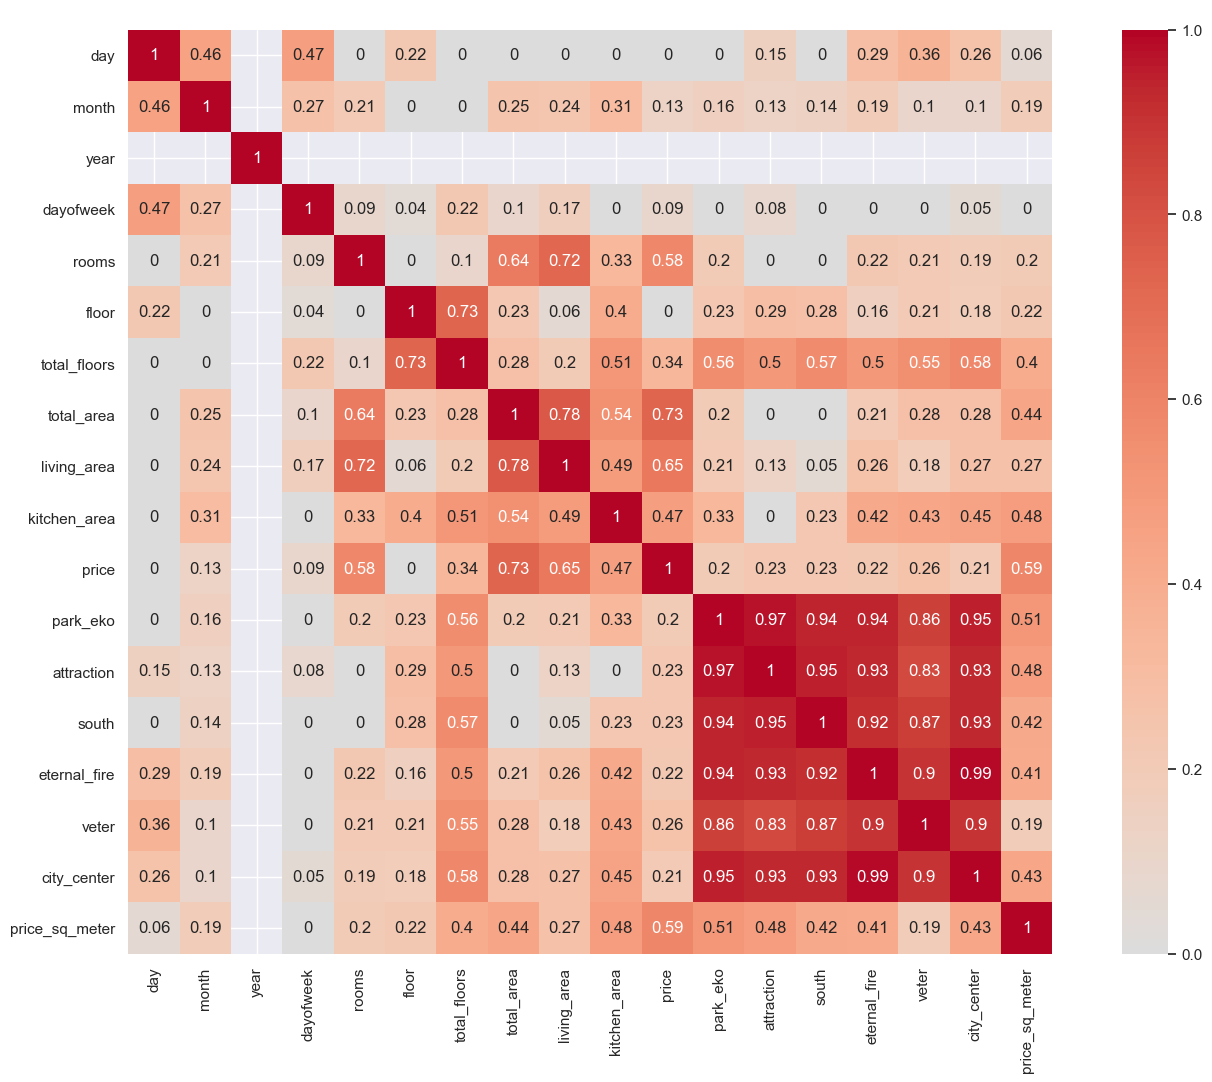

In [21]:
phik_overview = df[df.select_dtypes('number').columns].phik_matrix()
plt.figure(figsize=(18, 12))
plt.title(' ')
sns.heatmap(round(phik_overview, 2), 
            annot=True, 
            vmin=0, 
            vmax=1, 
            center=0, 
            cmap='coolwarm', 
            square=True);

Расстояния до парков мультиколлинеарны между собой. Наибольшее влияние на цену оказывает, как и ожидается, площадь квартиры и признаки косвенно от нее зависящие. Ожидалось что расстояние до центра города будет влиять сильнее на цену, но по всей видимости Магнитогорск не достаточно большой город по площади или не слишком высокий темп строительства(новые площади не так сильно требуются)

In [22]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [24]:
import folium
from folium.plugins import HeatMap

In [25]:
df['lat_long'] = df['lat_long'].dropna().apply(lambda x: tuple(float(i) for i in x.strip('()').split(',')))

In [26]:
m = folium.Map(
    location=[53.407164, 58.980285],
    zoom_start=12
)

# уберем концентрацию в центре для неопредленных адресов
drop_center = (53.3735251, 58.9769375)

In [27]:
heat_map = folium.plugins.HeatMap(
    data=[[row['lat_long'][0], row['lat_long'][1], row['price_sq_meter']] for index, row in df.query('lat_long != @drop_center').dropna().iterrows()],
    radius=20
).add_to(m)

m

По тепловой карте стоимости кв.м видим, что в основном недвижимость с высокой стоимостью концентрируется на севере на правом берегу. Также есть небольшие участки в центре и на юге.